# Monte Carlo
Begin: 2024-03-16

- 大多数的机器学习方法中使用的是参数的 **点估计 (point estimators)**，i.e.，$\arg \max_{\theta} f_\theta(X)$
- 在估计分布的参数时：极大似然估计(MLE)和最大后验估计(MAP)
- 在无法求得 $\arg \max_\theta f_\theta(X)$ 的解析解的情况下，可以采用一些迭代方法，如EM算法

这些方法都是点估计，因为它们只是给我们一个“最佳”的单一的 $\theta$。

## Monte Carlo Integration

### 1. 数学期望计算
(1). 要计算随机变量的某个函数的期望 $\mathbb E[f(x)]$，则需要计算以下积分：
    $$
        \mathbb E [f(x)] = \int f(x) \, p(x) \  \mathrm{d} x, \ x \in \mathbb R^n, \ f: \mathbb R^n \rightarrow \mathbb R^m
    $$
   $p(x)$ 是 $x$ 的目标分布，可以使用数值积分有效计算。
<br>

(2). 另一种方法是抽取多个随机样本，$x_n \sim p(x)$，然后计算：
    $$
        \mathbb E [f(x)]  \approx \frac{1}{N_S} \sum_{i=1}^{N_S} f(x_i)
    $$
   这称为**蒙特卡罗积分**。可以证明精度在原则上与 $x$ 维度无关，仅取决于样本数量 $N_S$。
<br>
### 2. 积分计算
对于一个一般的积分问题：$\int_x h(x) \ \mathrm{d} x$，可以找一个与积分问题的定义域空间一样的比较简单的分布 $X \sim P(X)$，并且满足 $\int_x p(x) \ \mathrm{d}x = 1$。采样 $n$ 个样本点 $\{x_1, x_2, \dots, x_n\}$，那么可以计算：
$$
    \int_x h(x) \ \mathrm{d}x = \int_x \frac{h(x)}{p(x)} \cdot p(x) \ \mathrm{d}x \approx \frac{1}{n} \sum_{i=1}^n \frac{h(x_i)}{p(x_i)}
$$
任何一个求积分的问题可以等价成求期望的问题。
<br>
### 3. 后验分布
在许多机器学习问题中，我们实际上对后验分布更加感兴趣：
$$
    p(\theta | \text{Data}) \propto p(\text{Data} | \theta) \, p(\theta)
$$
当我们需要得到这个后验分布的特征，如均值：$\mathbb E_{p(\theta | X)} [\theta]$，它的积分形式为：
$$
    \int_\theta \theta \, p(\theta | X) \ \mathrm{d} x
$$
但是当这个后验分布太过复杂时，我们无法计算积分，因此可以使用采样方法来 **近似** 这一均值：$\theta_i \mathop{\sim}\limits^{\text{iid}} p(\theta | X)$
$$
    \mathbb E_{p(\theta | X)} [\theta] \approx \frac{1}{n} \sum_{i=1}^n \theta_i
$$


### Example 1
**Q:** 求积分 $\int_0^1 e^{-x^2 / 2} \ \mathrm{d}x$。

**A:** 可以令 $p(x) = 1, \ x \sim  U(0, 1)$，在(0, 1)上进行均匀采样得到 $\{x_1, x_2, \dots, x_n\}$，然后计算：
$$
    \frac{1}{n} \sum_{i=1}^n \frac{h(x_i)}{p(x_i)} = \frac{1}{n} \sum_{i=1}^n h(x_i) = \frac{1}{n} \sum_{i=1}^n e^{-x_i^2 / 2}
$$

关于均匀分布采样的实现，可以使用 `np.random.random`。也可以从原理上实现：**线性同余**


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def generate_random(size=None, a=9, c=3, m=1024, seed=0):
    rst = []
    v = seed
    for _ in range(0, size):
        v = (a * v + c) % m
        rst.append(v / m)
    return np.asarray(rst)


# 定义计算式
def func(x):
    return np.mean(np.exp(-0.5 * (x ** 2)))

In [2]:
print(func(np.random.random(10)))
print(func(np.random.random(100)))
print(func(np.random.random(10000)))
print(func(np.random.random(1000000)))

0.8136962966706813
0.8282664545917736
0.8560033934887978
0.8555805417838129


### Example 2

**Q:** 求积分 $\int_{- \infty}^{\infty} x \frac{1}{\sqrt{2\pi}} \exp{(\frac{-x^2}{2})} \ \mathrm{d}x$。

**A:** 可以令 $p(x) = \frac{1}{\sqrt{2\pi}} \exp{(\frac{-x^2}{2})}$，即 $p(x)$ 刚好是一个标准的正态分布，那么可以对 $p(x)$ 采样 $n$ 个样本 $\{x_1, x_2, \dots, x_n\}$，就可以计算其积分的近似值：
$$
    \frac{1}{n} \sum_{i=1}^n \frac{h(x_i)}{p(x_i)} = \frac{1}{n} \sum_{i=1}^n x_i
$$
标准的正态分布可以使用 `np.random.randn`，从原理上实现正态分布采样：**Box Muller**。

In [5]:
print(np.mean(np.random.randn(10)))
print(np.mean(np.random.randn(100)))
print(np.mean(np.random.randn(1000)))
print(np.mean(np.random.randn(10000)))
print(np.mean(np.random.randn(100000)))
# 越接近0越正确

-0.1014018404990504
-0.12838054742383564
0.04599846964073687
0.012393343390563145
0.003153508857713008


### Example 3 (from RL lesson)

**Q:** 求积分 $\int_{0.8}^{3} f(x) \ \mathrm{d}x$，$f(x) = \frac{1}{1 + \sin x (\ln x)^2}$

**A:** 令 $p(x) = U(0.8, 3)$，那么可以计算积分的近似值：
$$
    \int_{0.8}^{3} f(x) \ \mathrm{d}x = \int_{0.8}^3 \frac{f(x)}{p(x)} p(x) \ \mathrm{d}x \approx  \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{p(x_i)}
$$ 

In [12]:
import numpy as np
import scipy
import sympy

# f(x)的计算式
def f_func(x):
    return 1 / (1 + np.sin(x) * (np.log(x)) ** 2)

def f_func_sympy(x):
    return 1 / (1 + sympy.sin(x) * (sympy.log(x)) ** 2)

def uniform_pdf(a, b):
    return 1 / (b - a)

In [13]:
# 数值解
res = scipy.integrate.quad(f_func, 0.8, 3)
print(res)

(1.7555487492318846, 4.193302505970682e-12)


In [18]:
# 解析解 这个积分没有解析解
x = sympy.symbols('x')
sympy.integrate(f_func_sympy(x), (x, 0.8, 3))

Integral(1/(log(x)**2*sin(x) + 1), (x, 0.8, 3))

In [19]:
# MC estimate
low = 0.8
high = 3
sample_size = 10000000
samples = np.random.uniform(low, high, sample_size)

int_ = np.mean(f_func(samples) / uniform_pdf(low, high))

print(int_)

1.7555291935856667


## Monte Carlo 方法的正确性

In [10]:
# import ipywidgets as widgets
import numpy as np
import math
import distrax
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

plt.style.use('default')
import scipy.stats as ss
from scipy.stats import gaussian_kde
from scipy.stats import norm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
jax.config.update("jax_platform_name", "cpu")

key = jax.random.PRNGKey(21)

在这里对一个高斯分布分别采样不同次数，并比较。当样本数量足够多时，由采样的结果所估计的分布和真实分布非常接近。

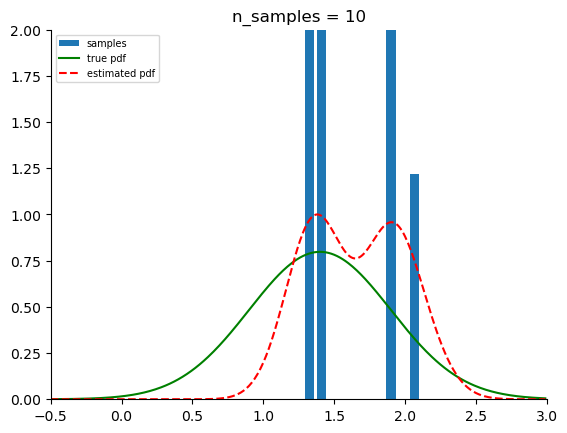

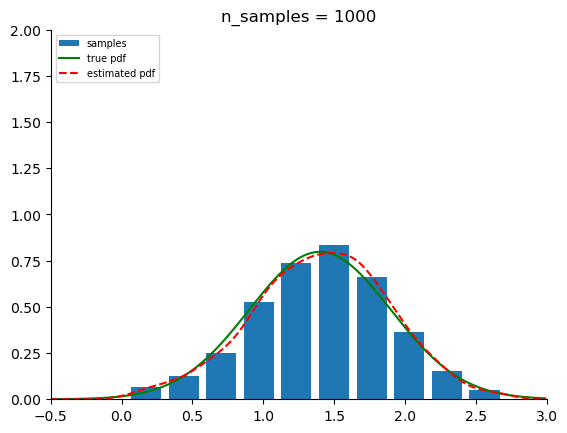

In [16]:
def plot_histogram(size, bw_method=None):
    x = jnp.arange(-0.5, 3, 0.01)
    norm = distrax.Normal(loc=1.4, scale=0.5)  # 生成一个标准的高斯分布
    y = norm.prob(x)  # 计算 pdf
    bw_adjusted = ""
    if bw_method:
        bw_adjusted = "bw_adjusted"

    norm_samples = norm.sample(seed=key, sample_shape=size)  # 采样

    fig, ax = plt.subplots()
    ax.hist(norm_samples, density=True, stacked=True, rwidth=0.8, label="samples")

    # kde plot
    kde = gaussian_kde(norm_samples, bw_method=bw_method)  # 高斯核密度估计
    y_estimate = kde(x)  # pdf 的估计值

    ax.plot(x, y, "g", label="true pdf")
    ax.plot(x, y_estimate, "r--", label="estimated pdf")
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(0, 2)
    ax.set_title("n_samples = %d" % size)
    ax.legend(loc=2, prop={"size": 7})
    sns.despine()
    # pml.savefig(f"mcAccuracyDemo{size}{bw_adjusted}")


for size in [10, 1000]:
    plot_histogram(size)
    plt.show()

# for size in [10, 100]:
#     plot_histogram(size, bw_method=0.75)
#     plt.show()

## Rejection Sampling

在拒绝采样中，引入一个提案分布 $q(x)$ ，对于某个常数 $C$，满足 $C q(x) \geq p(x)$。$C q(x)$ 为 $\tilde{p}$ 提供包络。

### Example 1: Sampling from Gamma distribution

伽马分布：
$$
    \text{Ga}(x | \alpha, \lambda) = \frac{1}{\Gamma(\alpha)} x^{\alpha-1} \lambda^\alpha \exp{(-\lambda x)}
$$
我们可以使用 $\text{Ga}(k, \lambda-1)$ 作为提案分布，$k = \lfloor \alpha \rfloor$。
$$
    \frac{p(x)}{q(x)} = \frac{\text{Ga}(x | \alpha, \lambda)}{\text{Ga}(x | k, \lambda-1)} = \frac{x^{\alpha-1} \lambda^\alpha \exp{(-\lambda x)} / \Gamma(\alpha)}{x^{k-1} (\lambda-1)^k \exp{(-(\lambda-1) x)} / \Gamma(k)}
$$
当 $x = \alpha - k$ 时，比率达到最大值。
$$
    C = \frac{\text{Ga}(\alpha - k | \alpha, \lambda)}{\text{Ga}(\alpha - k | k, \lambda-1)}
$$

In [13]:
alpha = 5.7
lam = 2

k = math.floor(alpha)  # floor 返回小于等于 alpha 的最大整数
C = ss.gamma.pdf(alpha - k, alpha, scale=(1 / lam)) / ss.gamma.pdf(alpha - k, k, scale=(1 / (lam - 1)))

In [14]:
print(C)

6.654894797951754


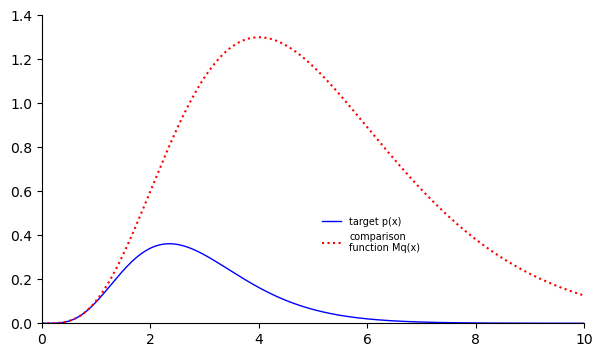

In [20]:
xs = np.arange(0, 10, 0.01)

fig, ax = plt.subplots(figsize=(7, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 1.4)
ax.plot(xs, ss.gamma.pdf(xs, alpha, scale=1 / lam), "b-", label="target p(x)", lw=1)
ax.plot(xs, C * ss.gamma.pdf(xs, k, scale=1 / (lam - 1)), "r:", label="comparison\nfunction Mq(x)", lw=1.5)
ax.legend(frameon=False, bbox_to_anchor=(0.5, 0.2), fontsize=7)
sns.despine()
# pml.savefig("rejectionSamplingDemo_latexified")
plt.show()

### Example 2:

从以下分布中采样：
$$
    p(x) = \frac{1}{255} \big[(x-2)^2 + (x-5)^3 + 100 \cos(x) + 21 \big], \  0 < x < 10
$$
这里的 $p(x)$ 是未归一化的。
简单地，令 $q(x) = 0.5, \ C = 2$

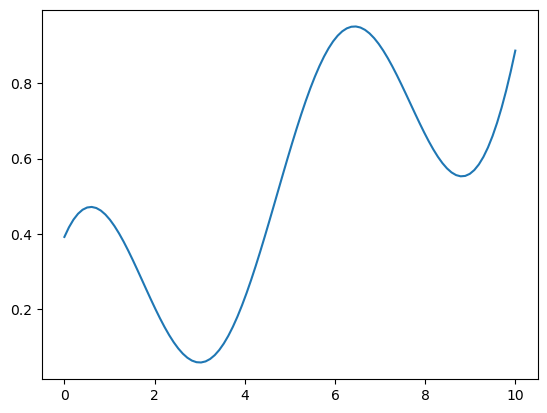

In [40]:
def p_func(x):
    return (np.power((x - 2), 2) + np.power((x - 5), 3) + 100 * np.cos(x) + 121) / 255


x = np.linspace(0, 10, 100)
plt.plot(x, p_func(x))

In [50]:
num_sampling = 10000
samples_accept = []
C = 2

for i in range(num_sampling):
    sample = np.random.uniform(0, 10)
    alpha = p_func(sample) / (0.6 * C)  # 计算接受率
    u = np.random.uniform(0, 1)  # Uniform(0, 1)

    if u < alpha:
        samples_accept.append(sample)

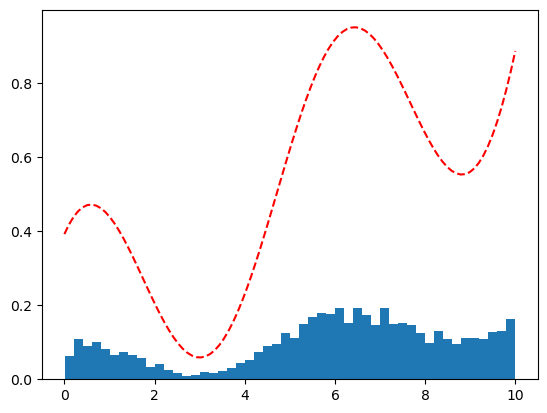

In [53]:
plt.plot(x, p_func(x), 'r--', label="p(x)", )  # TODO
plt.hist(samples_accept, bins=50, density=True)
plt.show()

### Adaptive rejection sampling (ARS)

下面给出一个 ARS 的例子：

对于一半的高斯分布进行采样。

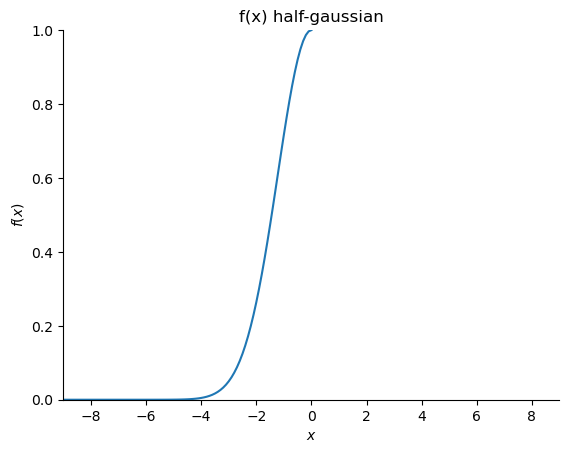

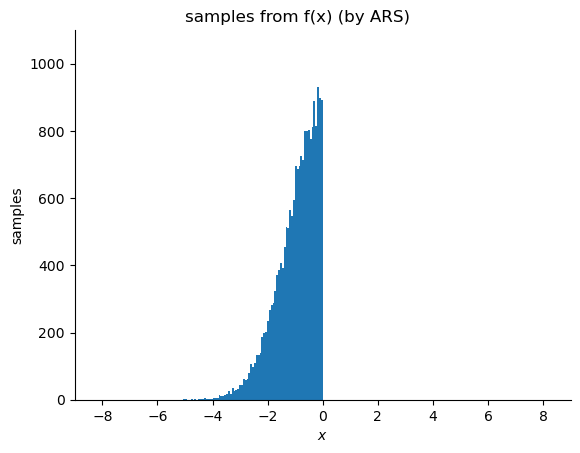

In [55]:
from arspy.ars import adaptive_rejection_sampling

a, b = -2, 0
domain = [-float("inf"), 0]
n_samples = 20000
sigma = 3


# 定义 half-Gaussian 的 log pdf
def halfgaussian_logpdf(x):
    out = np.log(np.exp(-(x ** 2) / sigma)) * np.heaviside(-x, 1)
    return out


xs = np.arange(-3 * sigma, 0.01, 0.1)
y = np.exp(halfgaussian_logpdf(xs))

samples = adaptive_rejection_sampling(logpdf=halfgaussian_logpdf, a=a, b=b, domain=domain, n_samples=n_samples)

# Title
plt.title("f(x) half-gaussian")

# Fix the plot size
plt.xlim(-3 * sigma, 3 * sigma)
plt.ylim(0, 1)

plt.plot(xs, y)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
sns.despine()
# savefig("ars_demo1")
plt.show()

# Title
plt.title("samples from f(x) (by ARS)", x=0.45)

# Fix the plot size
plt.xlim(-3 * sigma, 3 * sigma)
plt.ylim(0, 1100)

plt.hist(samples, bins=75)
plt.xlabel("$x$")
plt.ylabel("samples")
sns.despine()
# savefig("ars_demo2")
plt.show()